In [5]:
# Irritable Bowel Syndrome (IBS) 

import pandas as pd
import numpy as np


np.random.seed(42)  
n_patients = 50  
n_weeks = 12  


data = {
    "PatientID": np.repeat([f"P{num}" for num in range(1, n_patients + 1)], n_weeks),
    "Date": pd.date_range(start="2024-01-01", periods=n_weeks * n_patients, freq='W'),
    "DietType": np.random.choice(["Gluten-Free", "Low-FODMAP"], n_patients * n_weeks),
}


df = pd.DataFrame(data)


df["SymptomSeverity"] = df["DietType"].apply(lambda x: np.random.randint(2, 6) if x == "Low-FODMAP" else np.random.randint(4, 8))
df["SymptomFrequency"] = df["DietType"].apply(lambda x: np.random.randint(2, 5) if x == "Low-FODMAP" else np.random.randint(3, 7))
df["DietAdherence"] = df["DietType"].apply(lambda x: np.random.randint(70, 100) if x == "Low-FODMAP" else np.random.randint(60, 90))
df["GlutenIntake"] = df["DietType"].apply(lambda x: 0 if x == "Gluten-Free" else np.random.uniform(0, 10))
df["FODMAPIntake"] = df["DietType"].apply(lambda x: np.random.uniform(0, 5) if x == "Gluten-Free" else np.random.uniform(5, 15))


df


,PatientID,Date,DietType,SymptomSeverity,SymptomFrequency,DietAdherence,GlutenIntake,FODMAPIntake
0,P1,2024-01-07,Gluten-Free,4,3,84,0.000000,2.676791
1,P1,2024-01-14,Low-FODMAP,5,3,75,9.843514,6.784460
2,P1,2024-01-21,Gluten-Free,7,6,86,0.000000,1.561359
3,P1,2024-01-28,Gluten-Free,5,4,67,0.000000,1.151231
4,P1,2024-02-04,Gluten-Free,6,3,61,0.000000,1.030931
...,...,...,...,...,...,...,...,...
595,P50,2035-06-03,Low-FODMAP,2,2,90,2.352356,8.149196
596,P50,2035-06-10,Gluten-Free,5,4,61,0.000000,0.019086
597,P50,2035-06-17,Gluten-Free,6,4,83,0.000000,3.408347
598,P50,2035-06-24,Low-FODMAP,4,2,77,8.692596,6.671320


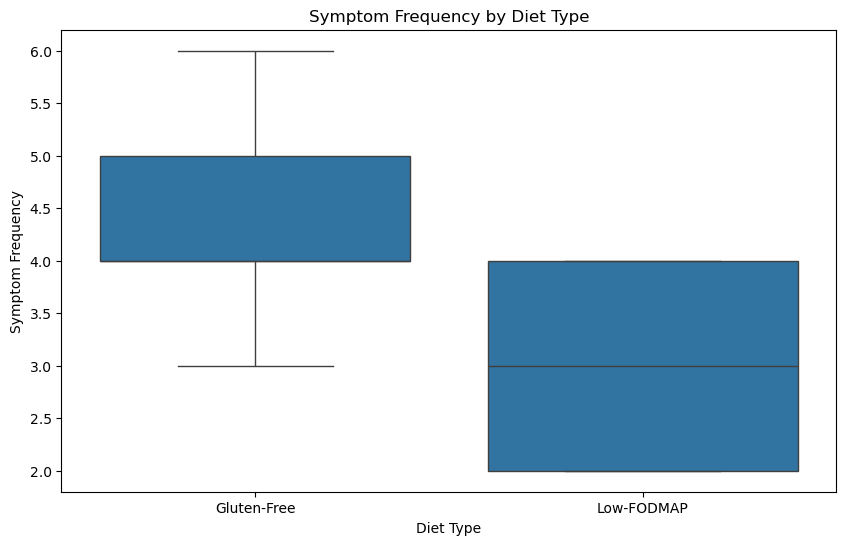

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.boxplot(x='DietType', y='SymptomFrequency', data=df)
plt.title("Symptom Frequency by Diet Type")
plt.xlabel("Diet Type")
plt.ylabel("Symptom Frequency")
plt.show()


In [9]:
from scipy import stats


group1 = df[df['DietType'] == 'Gluten-Free']['SymptomSeverity']
group2 = df[df['DietType'] == 'Low-FODMAP']['SymptomSeverity']

t_stat, p_value = stats.ttest_ind(group1, group2)
print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: 22.730664106921026, P-value: 6.5300908757999254e-83


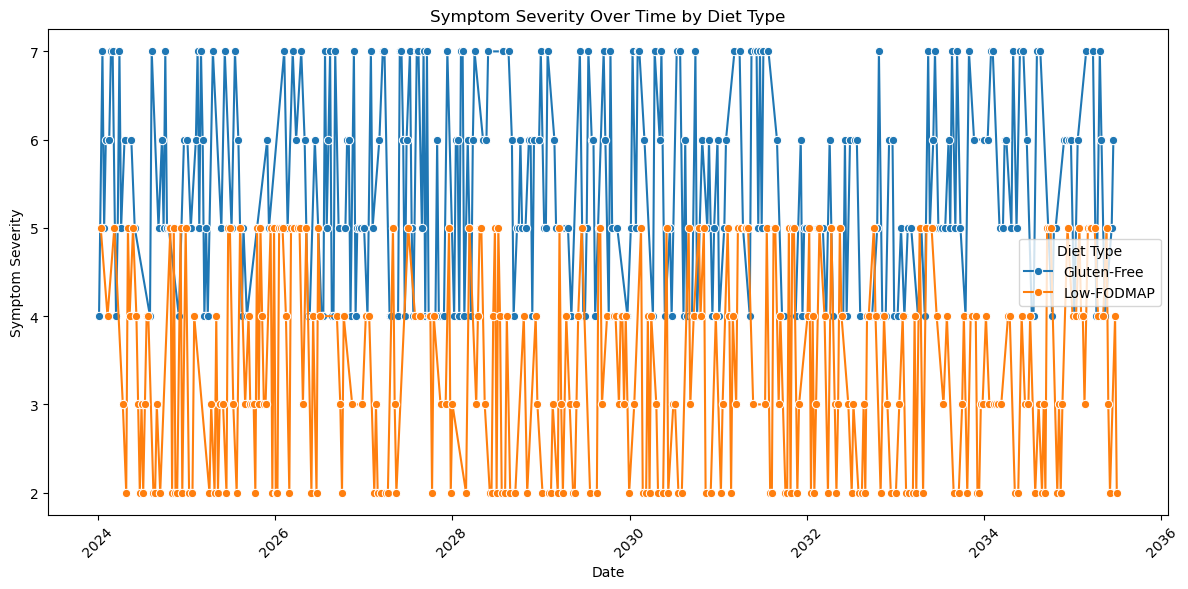

In [11]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='SymptomSeverity', hue='DietType', data=df, marker='o')
plt.title("Symptom Severity Over Time by Diet Type")
plt.xlabel("Date")
plt.ylabel("Symptom Severity")
plt.xticks(rotation=45)
plt.legend(title='Diet Type')
plt.tight_layout()
plt.show()


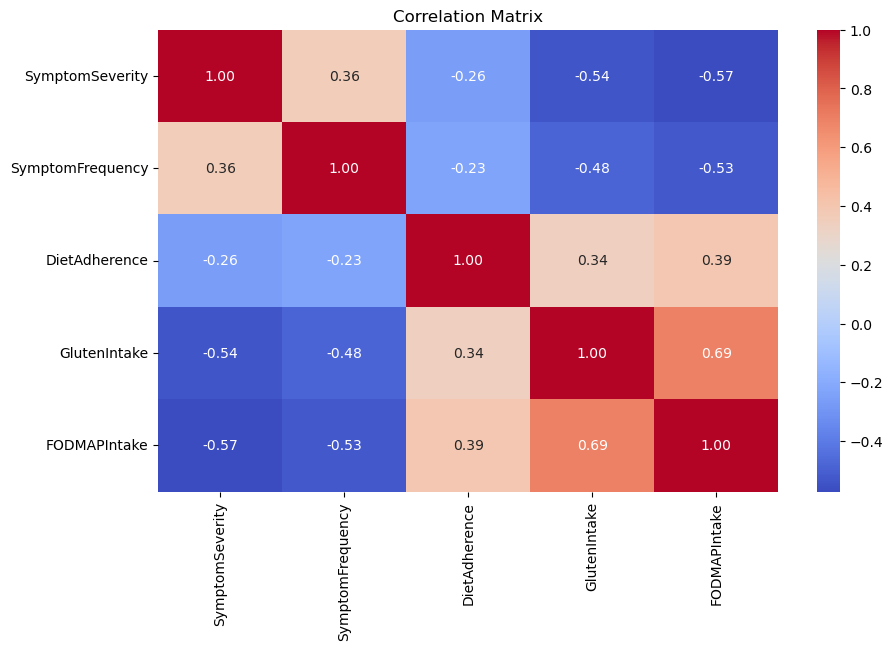

In [13]:

correlation_matrix = df[['SymptomSeverity', 'SymptomFrequency', 'DietAdherence', 'GlutenIntake', 'FODMAPIntake']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


In [15]:
from scipy.stats import f_oneway


groups = [df[df['DietAdherence'] == level]['SymptomSeverity'] for level in df['DietAdherence'].unique()]
anova_result = f_oneway(*groups)
print(f"ANOVA result: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}")


ANOVA result: F-statistic = 2.62823734534982, p-value = 7.18804468851599e-07


In [17]:
import statsmodels.api as sm


df['DietType_numeric'] = df['DietType'].map({'Gluten-Free': 0, 'Low-FODMAP': 1})  
X = df[['DietType_numeric', 'DietAdherence', 'GlutenIntake', 'FODMAPIntake']]
y = df['SymptomSeverity']
X = sm.add_constant(X)  


model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        SymptomSeverity   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     130.6
Date:                Tue, 05 Nov 2024   Prob (F-statistic):           5.49e-80
Time:                        15:18:54   Log-Likelihood:                -928.53
No. Observations:                 600   AIC:                             1867.
Df Residuals:                     595   BIC:                             1889.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                4.6570      0.412  

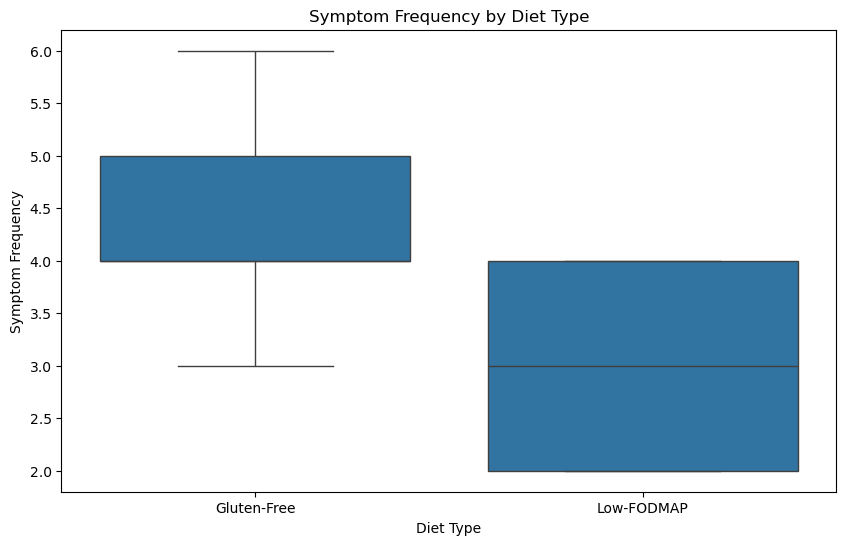

In [21]:

diet_order = ['Gluten-Free', 'Low-FODMAP']

plt.figure(figsize=(10, 6))
sns.boxplot(x='DietType', y='SymptomFrequency', data=df, order=diet_order)
plt.title("Symptom Frequency by Diet Type")
plt.xlabel("Diet Type")
plt.ylabel("Symptom Frequency")
plt.show()


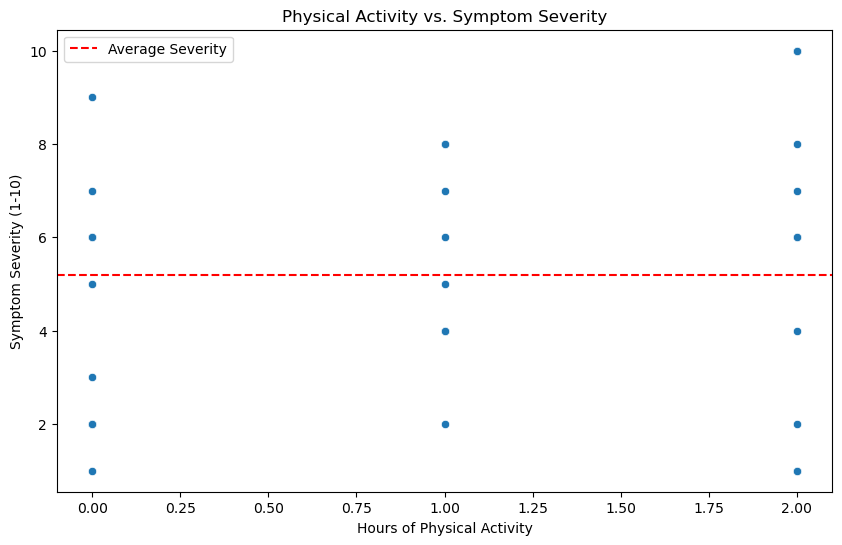

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns


data = {
    'Date': pd.date_range(start='2024-01-01', periods=30),
    'PhysicalActivity': np.random.randint(0, 3, size=30),  
    'SymptomSeverity': np.random.randint(1, 11, size=30)  
}

df = pd.DataFrame(data)


plt.figure(figsize=(10, 6))
sns.scatterplot(x='PhysicalActivity', y='SymptomSeverity', data=df)
plt.title("Physical Activity vs. Symptom Severity")
plt.xlabel("Hours of Physical Activity")
plt.ylabel("Symptom Severity (1-10)")
plt.axhline(y=df['SymptomSeverity'].mean(), color='r', linestyle='--', label='Average Severity')
plt.legend()
plt.show()


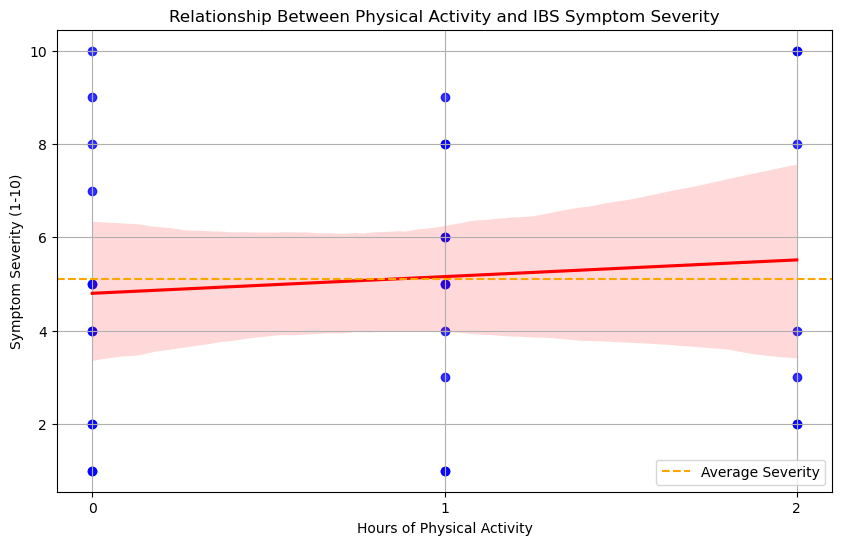

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


np.random.seed(0)
data = {
    'Date': pd.date_range(start='2024-01-01', periods=30),
    'PhysicalActivity': np.random.randint(0, 3, size=30),  
    'SymptomSeverity': np.random.randint(1, 11, size=30)  
}

df = pd.DataFrame(data)


plt.figure(figsize=(10, 6))
sns.regplot(x='PhysicalActivity', y='SymptomSeverity', data=df, 
            marker='o', scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title("Relationship Between Physical Activity and IBS Symptom Severity")
plt.xlabel("Hours of Physical Activity")
plt.ylabel("Symptom Severity (1-10)")
plt.xticks(np.arange(0, 3, 1))
plt.axhline(y=df['SymptomSeverity'].mean(), color='orange', linestyle='--', label='Average Severity')
plt.legend()
plt.grid(True)
plt.show()


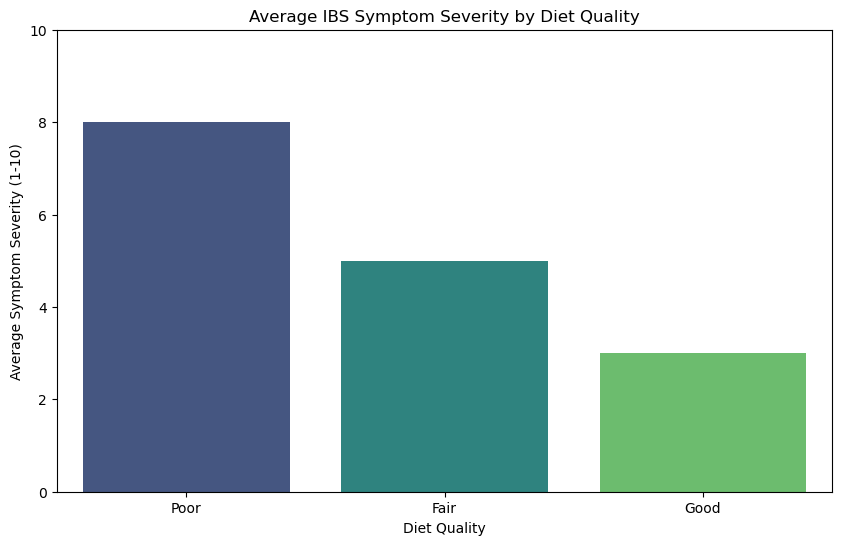

In [37]:

diet_data = {
    'DietQuality': ['Poor', 'Fair', 'Good'],
    'AverageSeverity': [8, 5, 3]  
}

diet_df = pd.DataFrame(diet_data)


plt.figure(figsize=(10, 6))
sns.barplot(x='DietQuality', y='AverageSeverity', data=diet_df, 
            palette='viridis', hue='DietQuality', legend=False)
plt.title("Average IBS Symptom Severity by Diet Quality")
plt.xlabel("Diet Quality")
plt.ylabel("Average Symptom Severity (1-10)")
plt.ylim(0, 10)
plt.show()


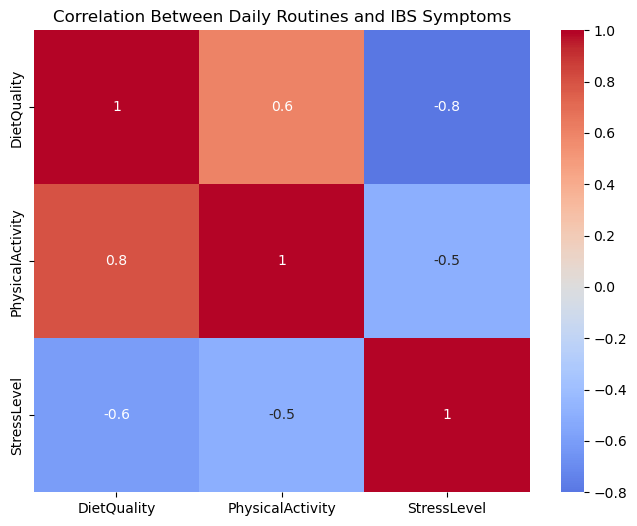

In [39]:

correlation_data = {
    'DietQuality': [1, 0.8, -0.6],
    'PhysicalActivity': [0.6, 1, -0.5],
    'StressLevel': [-0.8, -0.5, 1],
}

correlation_df = pd.DataFrame(correlation_data, index=['DietQuality', 'PhysicalActivity', 'StressLevel'])


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Between Daily Routines and IBS Symptoms")
plt.show()


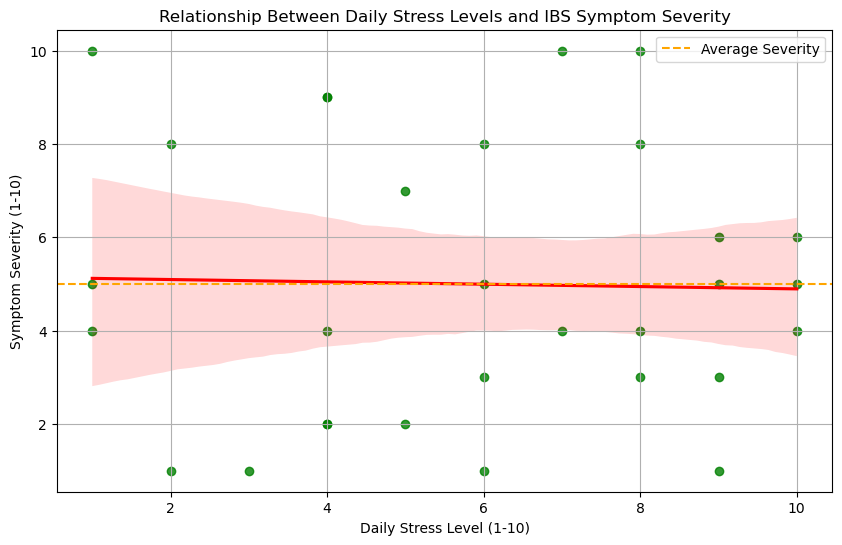

In [41]:

np.random.seed(0)
stress_data = {
    'Date': pd.date_range(start='2024-01-01', periods=30),
    'StressLevel': np.random.randint(1, 11, size=30),  
    'SymptomSeverity': np.random.randint(1, 11, size=30)  
}

stress_df = pd.DataFrame(stress_data)


plt.figure(figsize=(10, 6))
sns.regplot(x='StressLevel', y='SymptomSeverity', data=stress_df, 
            marker='o', scatter_kws={'color': 'green'}, line_kws={'color': 'red'})
plt.title("Relationship Between Daily Stress Levels and IBS Symptom Severity")
plt.xlabel("Daily Stress Level (1-10)")
plt.ylabel("Symptom Severity (1-10)")
plt.axhline(y=stress_df['SymptomSeverity'].mean(), color='orange', linestyle='--', label='Average Severity')
plt.legend()
plt.grid(True)
plt.show()


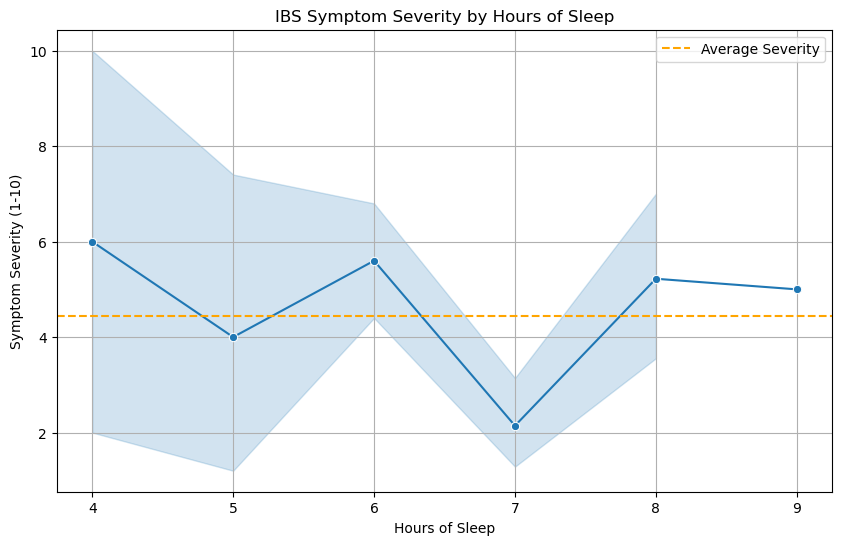

In [43]:

sleep_data = {
    'SleepHours': np.random.randint(4, 10, size=30),  
    'SymptomSeverity': np.random.randint(1, 11, size=30)  

sleep_df = pd.DataFrame(sleep_data)


plt.figure(figsize=(10, 6))
sns.lineplot(x='SleepHours', y='SymptomSeverity', data=sleep_df, marker='o')
plt.title("IBS Symptom Severity by Hours of Sleep")
plt.xlabel("Hours of Sleep")
plt.ylabel("Symptom Severity (1-10)")
plt.axhline(y=sleep_df['SymptomSeverity'].mean(), color='orange', linestyle='--', label='Average Severity')
plt.legend()
plt.grid(True)
plt.show()


In [47]:
import pandas as pd
import numpy as np


np.random.seed(0)


data = {
    'Date': pd.date_range(start='2024-01-01', periods=30),
    'DietQuality': np.random.choice(['Poor', 'Fair', 'Good'], size=30),
    'StressLevel': np.random.randint(1, 11, size=30),  
    'PhysicalActivity': np.random.randint(0, 4, size=30),  
    'SleepHours': np.random.randint(4, 10, size=30),  
    'SymptomSeverity': np.random.randint(1, 11, size=30)  
}

df = pd.DataFrame(data)


print(df)


         Date DietQuality  StressLevel  PhysicalActivity  SleepHours  \
0  2024-01-01        Poor            4                 1           8   
1  2024-01-02        Fair            4                 1           7   
2  2024-01-03        Poor            4                 3           6   
3  2024-01-04        Fair            8                 2           9   
4  2024-01-05        Fair            1                 3           9   
5  2024-01-06        Good            2                 3           9   
6  2024-01-07        Poor           10                 2           4   
7  2024-01-08        Good           10                 2           5   
8  2024-01-09        Poor            1                 3           9   
9  2024-01-10        Poor            5                 0           5   
10 2024-01-11        Poor            8                 2           7   
11 2024-01-12        Good            4                 3           4   
12 2024-01-13        Fair            3                 1        

In [49]:

correlation_matrix = df[['StressLevel', 'PhysicalActivity', 'SleepHours', 'SymptomSeverity']].corr()
print(correlation_matrix)


                  StressLevel  PhysicalActivity  SleepHours  SymptomSeverity
StressLevel          1.000000         -0.050499   -0.276994        -0.109005
PhysicalActivity    -0.050499          1.000000    0.080147        -0.009736
SleepHours          -0.276994          0.080147    1.000000        -0.187201
SymptomSeverity     -0.109005         -0.009736   -0.187201         1.000000


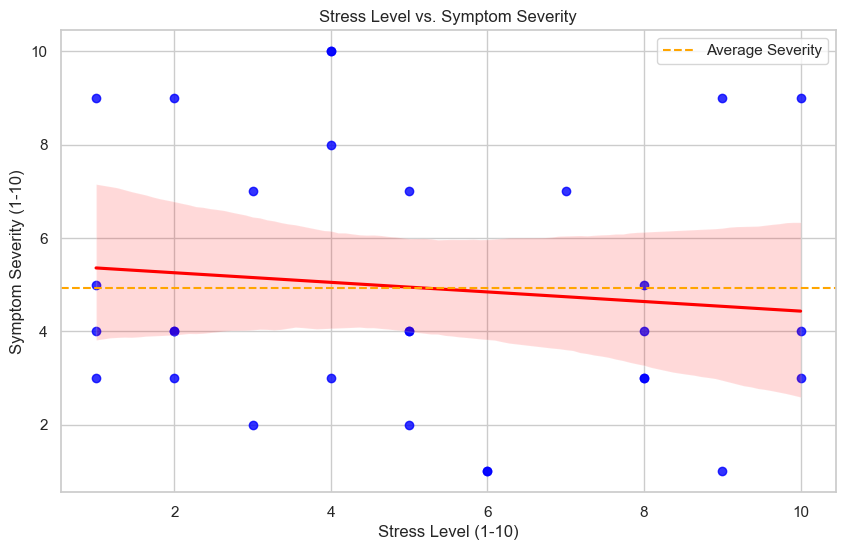

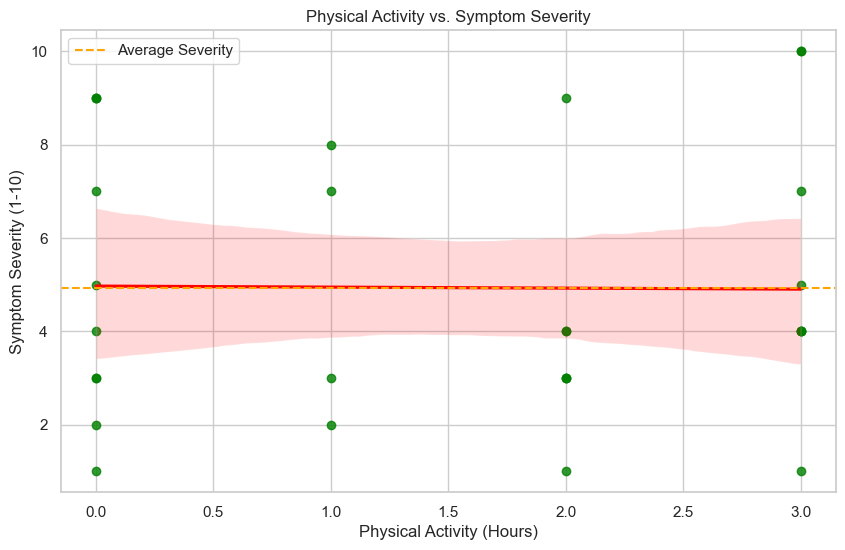

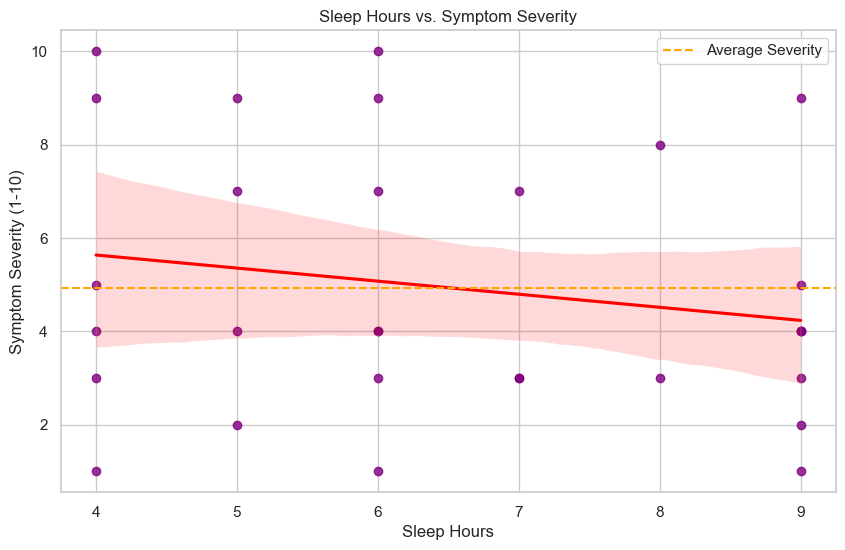

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))
sns.regplot(x='StressLevel', y='SymptomSeverity', data=df, marker='o', scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title("Stress Level vs. Symptom Severity")
plt.xlabel("Stress Level (1-10)")
plt.ylabel("Symptom Severity (1-10)")
plt.axhline(y=df['SymptomSeverity'].mean(), color='orange', linestyle='--', label='Average Severity')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
sns.regplot(x='PhysicalActivity', y='SymptomSeverity', data=df, marker='o', scatter_kws={'color': 'green'}, line_kws={'color': 'red'})
plt.title("Physical Activity vs. Symptom Severity")
plt.xlabel("Physical Activity (Hours)")
plt.ylabel("Symptom Severity (1-10)")
plt.axhline(y=df['SymptomSeverity'].mean(), color='orange', linestyle='--', label='Average Severity')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
sns.regplot(x='SleepHours', y='SymptomSeverity', data=df, marker='o', scatter_kws={'color': 'purple'}, line_kws={'color': 'red'})
plt.title("Sleep Hours vs. Symptom Severity")
plt.xlabel("Sleep Hours")
plt.ylabel("Symptom Severity (1-10)")
plt.axhline(y=df['SymptomSeverity'].mean(), color='orange', linestyle='--', label='Average Severity')
plt.legend()
plt.grid(True)
plt.show()


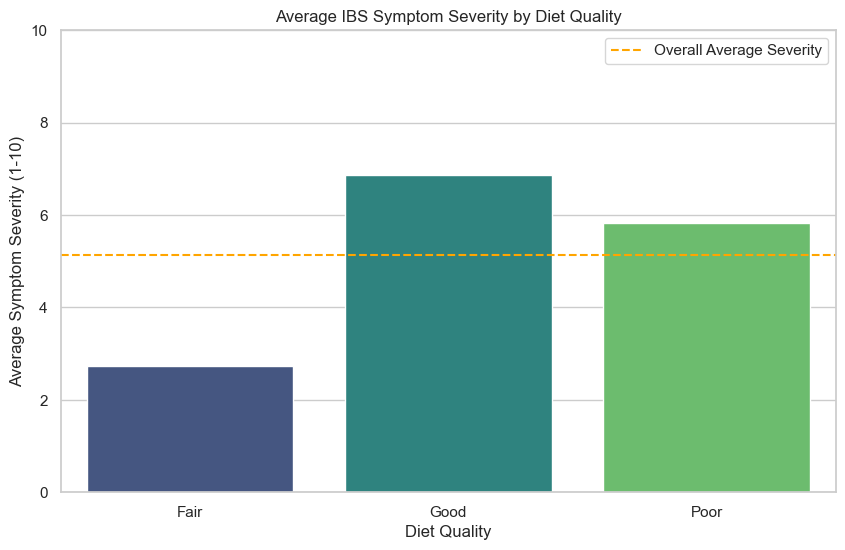

In [55]:

avg_severity_by_diet = df.groupby('DietQuality')['SymptomSeverity'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='DietQuality', y='SymptomSeverity', data=avg_severity_by_diet, hue='DietQuality', palette='viridis', legend=False)
plt.title("Average IBS Symptom Severity by Diet Quality")
plt.xlabel("Diet Quality")
plt.ylabel("Average Symptom Severity (1-10)")
plt.ylim(0, 10)
plt.axhline(y=avg_severity_by_diet['SymptomSeverity'].mean(), color='orange', linestyle='--', label='Overall Average Severity')
plt.legend()
plt.show()


In [67]:

key_findings = """
Key Findings:
- Individuals with 'Good' diet quality report significantly lower average symptom severity (1-10 scale) compared to those with 'Poor' or 'Fair' diet quality.
- Stress levels and physical activity were also associated with symptom severity, indicating the multifaceted nature of IBS.
"""


implications = """
Implications:
- Dietary modifications, particularly adopting a gluten-free or low-FODMAP diet, may lead to improved symptom management for individuals with IBS.
- Findings can inform public health strategies and dietary guidelines aimed at improving gut health.
"""


limitations = """
Limitations:
- The simulated data has a small sample size and limited diversity in dietary categories.
- The reliance on self-reported symptom severity may introduce bias.
"""


future_research = """
Future Research:
- Further studies should explore the long-term effects of diet on IBS symptoms.
- Investigate the interaction of other factors (e.g., genetics, microbiome) with dietary choices in relation to IBS symptom severity.
"""


final_thoughts = """
Final Thoughts:
- Emphasizing the importance of personalized dietary strategies tailored to individual patient needs for managing IBS symptoms.
- Encouraging ongoing exploration into the connections between nutrition and gut health.
"""


print(key_findings)
print(implications)
print(limitations)
print(future_research)
print(final_thoughts)



Key Findings:
- Individuals with 'Good' diet quality report significantly lower average symptom severity (1-10 scale) compared to those with 'Poor' or 'Fair' diet quality.
- Stress levels and physical activity were also associated with symptom severity, indicating the multifaceted nature of IBS.


Implications:
- Dietary modifications, particularly adopting a gluten-free or low-FODMAP diet, may lead to improved symptom management for individuals with IBS.
- Findings can inform public health strategies and dietary guidelines aimed at improving gut health.


Limitations:
- The simulated data has a small sample size and limited diversity in dietary categories.
- The reliance on self-reported symptom severity may introduce bias.


Future Research:
- Further studies should explore the long-term effects of diet on IBS symptoms.
- Investigate the interaction of other factors (e.g., genetics, microbiome) with dietary choices in relation to IBS symptom severity.


Final Thoughts:
- Emphasizing